In [ ]:
# Necessary Libraries.
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is built on top of matplotlib and offers more visually appealing plots.
import time
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('../data/all.csv')

In [ ]:
# Convert non-numeric values in 'relativePerformance' to NaN
df['relativePerformance'] = pd.to_numeric(df['relativePerformance'], errors='coerce')

# Drop rows where 'relativePerformance' is NaN
df = df.dropna(subset=['relativePerformance'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df['transactionDate'] = pd.to_datetime(df['transactionDate'])
df['transactionDate'] = df['transactionDate'].apply(lambda x: x.toordinal())
print(df.head())

In [ ]:
#preprocessing
# Cap infinite values to a large number
max_value = 1000
df['insiderPortfolioChange'] = df['insiderPortfolioChange'].replace([np.inf, -np.inf], max_value)

df = df.drop(columns=['filingDate'])
df = df.drop(columns=['source'])
df = pd.get_dummies(df, columns=['name', 'symbol', 'transactionCode', 'buyOrSale'])
print(df.head())

In [39]:
#split model into test and train
X = df.drop('relativePerformance', axis=1)  # Features
y = df['relativePerformance']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
from sklearn.metrics import mean_squared_error

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.003594535079607938


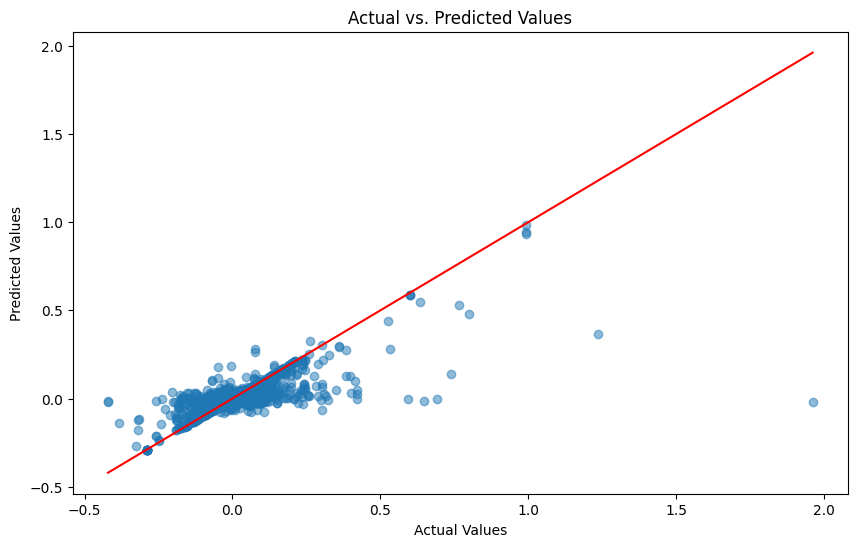

In [45]:
import matplotlib.pyplot as plt

# Predict values for the test set
y_pred = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # y=x line
plt.show()

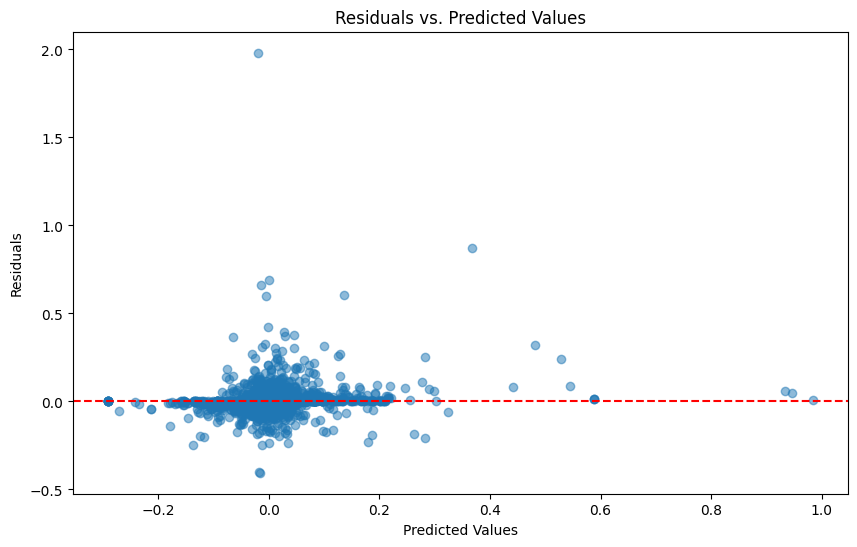

In [46]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


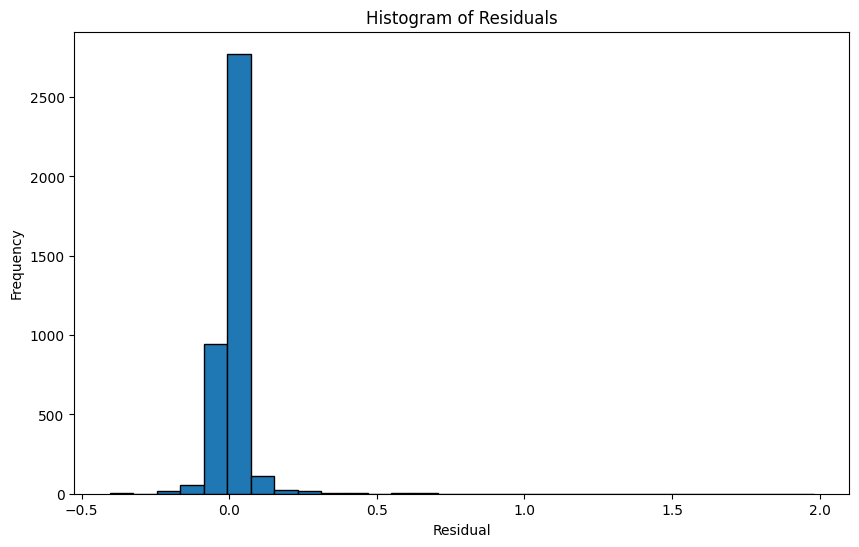

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
